In [2]:
import numpy as np
from numpy import *
import random
import math
import pandas as pd
import operator
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [8]:
def getDataset(num):
    x = np.random.randint(low=1, high=20, size=(num,2))
    avg1 = x[:,0].sum()/x.shape[0]
    a = x.shape[0]
    label = []
    for i in range(0, a):
        if x[i,0] <= avg1:
            label.append('A')    
        if x[i,0] > avg1:
            label.append('B')
    return x, label

In [9]:
data, label = getDataset(20)

In [10]:
target = np.random.randint(low=1, high=20, size=(1,2))
target

array([[6, 5]])

In [11]:
def KNearestNeighbor(k, targetpoint, data, label):
    """
    计算目标点与所有点之间的欧式距离，并按照从小到大排序，取k个中数量最多的label
    """
    DatasetSize = data.shape[0]
    diffMat = tile(targetpoint, (DatasetSize, 1)) - data
    squarediffMat = diffMat ** 2
    squareDistance = squarediffMat.sum(axis=1)
    Distance = sqrt(squareDistance)

    sortDistanceIn = Distance.argsort()   # 返回排序结果，为原数据对应的索引

    classCount = {}

    for i in range(k):
        position = where(sortDistanceIn == i)[0][0]
        votellabel = label[position]
        classCount[votellabel] = classCount.get(votellabel, 0) + 1
    sortclassCount = sorted(classCount.items(), key=operator.itemgetter(1), reverse=True)
    return sortclassCount[0][0]

In [12]:
KNearestNeighbor(k=5, targetpoint=[18,11], data=data, label=label)

'B'

In [13]:
# for i in range(5):
#     # position = where(sortDistanceIn == i)[0][0]
#     #print(sortDistanceIn[i])
#     votellabel = label[sortDistanceIn[i]]
#     print(votellabel)
#     classCount[votellabel] = classCount.get(votellabel, 0) + 1

In [14]:
iris_dataset = load_iris()

In [15]:
iris_dataset['data']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [16]:
iris_dataset['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [17]:
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=0)

In [18]:
finalist = []
for i in range(X_test.shape[0]):
    result = KNearestNeighbor(k=5, targetpoint=X_test[i], data=X_train, label=y_train)
    finalist.append(result)
finalist = np.array(finalist)
    

In [19]:
finalist

array([1, 2, 0, 0, 0, 0, 2, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2,
       0, 0, 1, 2, 0, 2, 1, 2, 0, 0, 0, 1, 2, 2, 0, 1])

In [20]:
count = 0
for i in finalist - y_test:
    if i == 0:
        count += 1
accuracy = count/y_test.shape[0]

In [21]:
accuracy

0.3157894736842105

In [22]:
klist = list(range(1,11))
alist = []
for j in klist:
    finalist = []
    for i in range(X_test.shape[0]):
        result = KNearestNeighbor(k=j, targetpoint=X_test[i], data=X_train, label=y_train)
        finalist.append(result)
    finalist = np.array(finalist)
    count = 0
    for s in finalist - y_test:
        if s == 0:
            count += 1
    accuracy = count/y_test.shape[0]
    alist.append(accuracy)

In [23]:
klist

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [24]:
alist

[0.5526315789473685,
 0.5526315789473685,
 0.2894736842105263,
 0.3157894736842105,
 0.3157894736842105,
 0.34210526315789475,
 0.2894736842105263,
 0.2894736842105263,
 0.2894736842105263,
 0.23684210526315788]

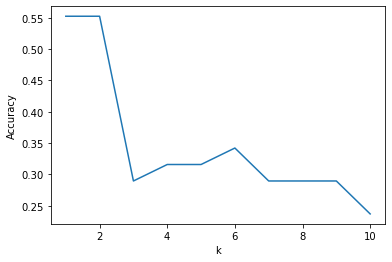

In [25]:
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.plot(klist, alist)
plt.show()